# 07_Image_Colorization
In this notebook, we will utilize pretrained neural networks to color black and white images.
The main purpose of this is to allow the readers to explore the practical applications of neural networks.

### Getting code

In [3]:
!git clone https://github.com/jantic/DeOldify.git DeOldify 

Cloning into 'DeOldify'...
remote: Enumerating objects: 2096, done.
remote: Total 2096 (delta 0), reused 0 (delta 0), pack-reused 2096
Receiving objects: 100% (2096/2096), 69.34 MiB | 15.39 MiB/s, done.
Resolving deltas: 100% (945/945), done.
Checking connectivity... done.


In [4]:
cd DeOldify

/home2/jiwan.chung/projects/misc/pytorch_tutorial/DeOldify


### Installing Requirements

In [7]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7

device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

In [8]:
!pip install -r colab_requirements.txt

     |████████████████████████████████| 214 kB 896 kB/s eta 0:00:01
     |████████████████████████████████| 129 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 16.5 MB/s eta 0:00:01
     |████████████████████████████████| 9.8 MB 21.5 MB/s eta 0:00:01
  Using cached beautifulsoup4-4.9.1-py3-none-any.whl (115 kB)
     |████████████████████████████████| 78 kB 10.3 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 10.5 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 164 kB 18.9 MB/s eta 0:00:01
     |████████████████████████████████| 118 kB 21.8 MB/s eta 0:00:01
     |████████████████████████████████| 185 kB 22.7 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 1.5 MB/s  eta 0:00:01
     |████████████████████████████████| 2.1 MB 26.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 21.9 MB/s 

In [9]:
import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

### Downloading model checkpoints

In [10]:
!mkdir 'models'
!wget https://www.dropbox.com/s/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth?dl=0 -O ./models/ColorizeArtistic_gen.pth

--2020-07-21 08:29:45--  https://www.dropbox.com/s/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6030:1::a27d:5001
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth [following]
--2020-07-21 08:29:46--  https://www.dropbox.com/s/raw/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc922596c6456ffeafb48d414ab9.dl.dropboxusercontent.com/cd/0/inline/A745on3F81gYihk_mDbdZEGC40vjA-UukSzNQAoqxLItjCu4SY0k8YCbWxTZuo12qu37Tookjnu-TWyfZVZptVuY2NudLXgbyDmNYmUxv08cTA/file# [following]
--2020-07-21 08:29:47--  https://uc922596c6456ffeafb48d414ab9.dl.dropboxusercontent.com/cd/0/inline/A745on3F81gYihk_mDbdZEGC40vjA-UukSzNQAoqxLItjCu4SY0k8YCbWxTZuo12qu37Tookjnu-TWyfZVZptVuY2Nu

In [11]:
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

--2020-07-21 08:30:04--  https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.108.133
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9210 (9.0K) [image/png]
Saving to: ‘./resource_images/watermark.png’

./resource_images/w 100%[===================>]   8.99K  --.-KB/s    in 0s      

2020-07-21 08:30:05 (59.6 MB/s) - ‘./resource_images/watermark.png’ saved [9210/9210]



In [12]:
colorizer = get_image_colorizer(artistic=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home2/jiwan.chung/.cache/torch/checkpoints/resnet34-333f7ec4.pth


### Colorization

In [19]:
def colorize(source_url):
    source_url = 'https://preview.redd.it/ionveb6ww1c51.jpg?width=640&crop=smart&auto=webp&s=ecf5262c00c34924d3267a8d4c0ba4c433808cf8' #@param {type:"string"}
    render_factor = 35  #@param {type: "slider", min: 7, max: 40}
    watermarked = True #@param {type:"boolean"}

    if source_url is not None and source_url !='':
        image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
        show_image_in_notebook(image_path)
    else:
        print('Provide an image url and try again.')

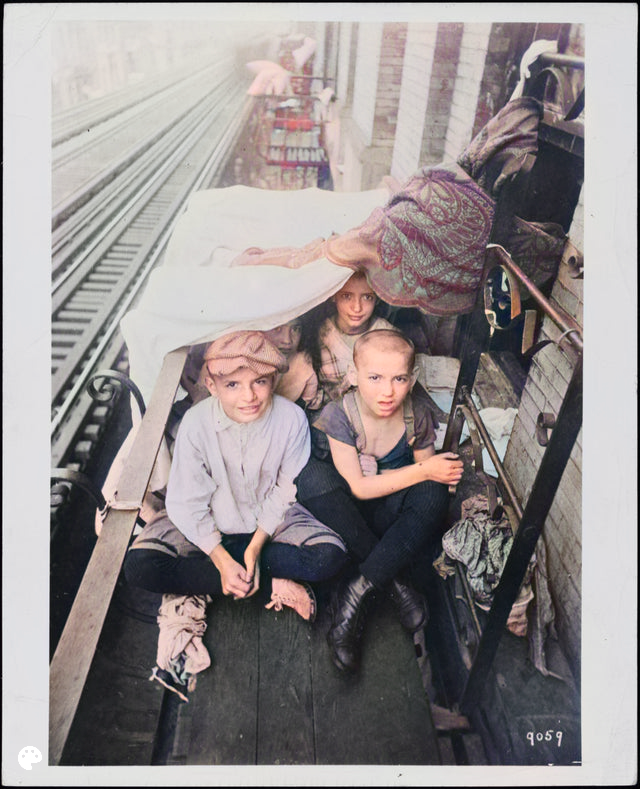

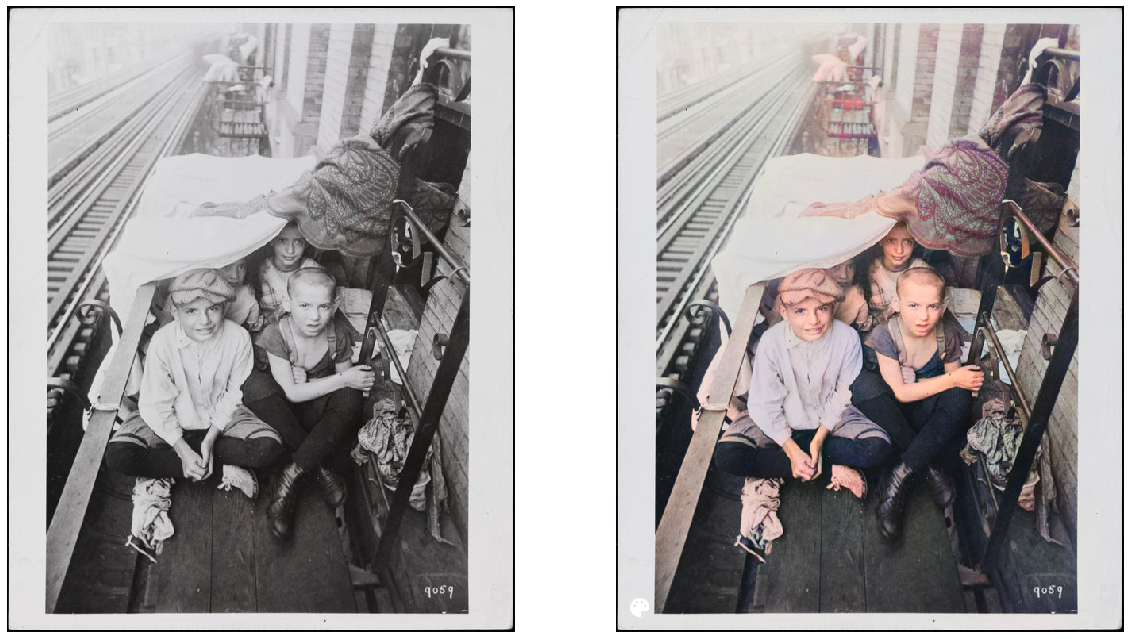

In [20]:
# example image

colorize('https://preview.redd.it/ionveb6ww1c51.jpg?width=640&crop=smart&auto=webp&s=ecf5262c00c34924d3267a8d4c0ba4c433808cf8')

### Try any black and white images!

Example source: [/r/TheWayWeWere](https://www.reddit.com/r/TheWayWeWere/)